# 单细胞测序和单细胞核测序整合
纳入标准：
1. 时间点相同
2. 测序平台相同
3. 细胞占比类似（可选，测序手段导致细胞占比会有较大差异）
4. 造模手段相同（可选，单核测序数据比较少，这一点难以满足）

符合纳入标准的单细胞核数据集
|time|snRNA-seq|platform|modeling|sample cell number|
|----|---------|--------|--------|-----------------|
|`sham`|`GSE233815`|`10X Genomics`|`pMCAO`|1988|
|`1d`|`GSE233815`|`10X Genomics`|`pMCAO`|961|
|`3d`|`GSE233815`|`10X Genomics`|`pMCAO`|3007|
|`7d`|`GSE233815`|`10X Genomics`|`pMCAO`|1501|

符合纳入标准的单细胞数据集
|time|scRNA-seq|platform|modeling|sample cell number|
|----|---------|--------|--------|-----------------|
|`sham`|`GSE142445`|`10X Genomics`|`tMCAO`|11429|
|`1d`|`GSE142445`|`10X Genomics`|`tMCAO`|702|
|`3d`|`GSE142445`|`10X Genomics`|`tMCAO`|647|
|`7d`|`GSE142445`|`10X Genomics`|`tMCAO`|948|
|`sham`|`GSE227651`|`10X Genomics`|`tMCAO`|10534|
|`1d`|`GSE227651`|`10X Genomics`|`tMCAO`|16133|
|`3d`|`GSE227651`|`10X Genomics`|`tMCAO`|11089|
|`7d`|`GSE227651`|`10X Genomics`|`tMCAO`|16417|

|Sample ID|实验分组|
|---------|-------|
|GSM4227433|4hr_contralateral|
|GSM4227434|4hr_ipsilateral|
|GSM4227435|1d_contralateral|
|GSM4227436|1d_ipsilateral|
|GSM4227437|3d_contralateral|
|GSM4227438|3d_ipsilateral|
|GSM4227439|7d_contralateral|
|GSM4227440|7d_ipsilateral|
|GSM4227441|uninjured_1|
|GSM4227442|uninjured_2|
|GSM4227443|uninjured_3|
|GSM7104632|tMCAO_day 1|
|GSM7104633|tMCAO_day 3|
|GSM7104634|tMCAO_day 7|
|GSM7104635|sham_day 7|
|GSM7437217|sham|
|GSM7437218|pMCAO_D1|
|GSM7437219|pMCAO_D3|
|GSM7437220|pMCAO_D7|

## 数据集读取

执行命令行文件`sh copy_scdata.sh`复制文件

In [25]:
%reset -f
import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np
import yaml
import os

display(os.getcwd())
sc.settings.verbosity = 3
with open("config.yaml", "r") as f:
    config = yaml.safe_load(f)
    
targets = pd.DataFrame({
    "id": ["GSM4227433","GSM4227434","GSM4227435","GSM4227436","GSM4227437","GSM4227438","GSM4227439","GSM4227440","GSM4227441","GSM4227442","GSM4227443",
           "GSM7104632","GSM7104633","GSM7104634","GSM7104635",
           "GSM7437217","GSM7437218","GSM7437219","GSM7437220"],
    "condition": ["sham","MCAO","sham","MCAO","sham","MCAO","sham","MCAO","sham","sham","sham",
                  "MCAO","MCAO","MCAO","sham",
                  "sham","MCAO","MCAO","MCAO"],
    "time": ["4hr","4hr","1d","1d","3d","3d","7d","7d","unknown","unknown","unknown",
             "1d","3d","7d","7d",
             "unknown","1d","3d","7d"],
})
targets.to_csv("data/targets.csv", index=None)
targets

'/Volumes/MacPassport/project/bioinfo/sn_sc_intergration'

,id,condition,time
0,GSM4227433,sham,4hr
1,GSM4227434,MCAO,4hr
2,GSM4227435,sham,1d
3,GSM4227436,MCAO,1d
4,GSM4227437,sham,3d
5,GSM4227438,MCAO,3d
6,GSM4227439,sham,7d
7,GSM4227440,MCAO,7d
8,GSM4227441,sham,unknown
9,GSM4227442,sham,unknown


In [26]:
adatas = {}

for set,fn in zip(config["batch"], config["filename"]):
    sample_adata = ad.read_h5ad(f"data/{fn}")
    adatas[set] = sample_adata

# 合并所有样本
adata_raw = ad.concat(adatas=adatas, label="batch")
adata_raw.raw = adata_raw.copy()
adata_raw.write(f"data/{config['project_code']}_intergrate_after_qc.h5ad")
adata_raw

/opt/anaconda3/envs/bioinfo/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/anaconda3/envs/bioinfo/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/anaconda3/envs/bioinfo/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/anaconda3/envs/bioinfo/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/anaconda3/envs/bioinfo/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Obs

AnnData object with n_obs × n_vars = 75356 × 16422
    obs: 'condition', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'passing_hb', 'n_genes', 'doublet_score', 'predicted_doublet', 'batch'

# 去除批次效应

## 预处理

In [3]:
%reset -f
import scanpy as sc
import scanpy.external as sce
import pandas as pd
import yaml
import os

os.getcwd()
with open("config.yaml", "r") as f:
    config = yaml.safe_load(f)
sc.settings.verbosity = 3

adata = sc.read(f"data/{config['project_code']}_intergrate_after_qc.h5ad")
display(adata)
# 备份原始数据
adata.raw = adata.copy()

# 筛选前去掉有问题的基因
# 把所有基因名取出来
genes = adata.var_names
# 构建布尔掩码，保留你想保留的基因
mask = ~genes.str.match("^Gm") \
        & ~genes.str.endswith("Rik") \
        & ~genes.str.match("^CT|^BC") \
        & ~genes.str.contains("Mir|Ftx|Tsix|Firre|Snhg|Kcnq1ot1", case=False) \
        & ~genes.str.contains("Eif2s3y|Ddx3y|Uty|Kdm5d", case=False) \
        & ~genes.str.contains("^Hb[ab]-[^\t\n]+.*$", case=False) \
        & ~genes.str.match("^Rps|^Rpl", case=False) \
        & ~genes.str.match("^mt-", case=False)
# 应用这个掩码来过滤基因
adata = adata[:, mask].copy()

# 归一化
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
# 筛选高可变基因
# batch_key:按样本筛选高变基因
sc.pp.highly_variable_genes(adata, n_top_genes=3000, batch_key="sample")
# highly_variable_nbatches：哪一个样本的batch中出现的hvg，0代表非hvg
adata = adata[:, adata.var.highly_variable]
# 输出高变基因供查找
pd.Series(adata.var.index).to_csv("result/hvg.csv")

/opt/anaconda3/envs/bioinfo/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 75356 × 16422
    obs: 'condition', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'passing_hb', 'n_genes', 'doublet_score', 'predicted_doublet', 'batch'

/opt/anaconda3/envs/bioinfo/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


normalizing counts per cell
    finished (0:00:00)


/opt/anaconda3/envs/bioinfo/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


## harmony去除批次效应

In [4]:
# 如果有文件则读取之前的文件
if os.path.exists(f"data/{config['project_code']}_cluster.h5ad"):
    adata = sc.read(f"data/{config['project_code']}_cluster.h5ad")
# harmony
sc.tl.pca(adata, n_comps=50)
# 包的作者停止维护了，如果不能安装，强制安装即可
# pip install harmonypy (--no-deps)
sce.pp.harmony_integrate(adata=adata, 
                         key=['batch'],
                         basis='X_pca',
                         max_iter_harmony = 20,
                         theta = None,
                         lamb = None,
                         sigma = 0.1, 
                         nclust = None,
                         tau = 0,
                         block_size = 0.05, 
                         max_iter_kmeans = 20,
                         epsilon_cluster = 1e-5,
                         epsilon_harmony = 1e-4, 
                         adjusted_basis='X_harmony')
# umap
sc.pp.neighbors(adata=adata, use_rep='X_harmony')
sc.tl.umap(adata=adata)
# tsne
sc.tl.tsne(adata=adata, use_rep='X_harmony')
display(adata)
adata.write(f"data/{config['project_code']}_cluster.h5ad")
adata.obsm

computing PCA
    with n_comps=50


/opt/anaconda3/envs/bioinfo/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


    finished (0:00:05)


2025-07-17 14:09:47,396 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-07-17 14:09:53,946 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-07-17 14:09:54,105 - harmonypy - INFO - Iteration 1 of 20
2025-07-17 14:10:08,719 - harmonypy - INFO - Iteration 2 of 20
2025-07-17 14:10:23,823 - harmonypy - INFO - Converged after 2 iterations


computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:11)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:31)
computing tSNE
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm)
    'tsne', tSNE parameters (adata.uns) (0:03:18)


AnnData object with n_obs × n_vars = 75356 × 3000
    obs: 'condition', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'passing_hb', 'n_genes', 'doublet_score', 'predicted_doublet', 'batch', '_scvi_batch', '_scvi_labels', 'scina_local_labels'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'log1p', 'neighbors', 'pca', 'scina_local_labels_colors', 'tsne', 'umap'
    obsm: 'X_harmony', 'X_pca', 'X_scvi', 'X_tsne', 'X_umap', 'probabilities'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

AxisArrays with keys: X_harmony, X_pca, X_scvi, X_tsne, X_umap, probabilities

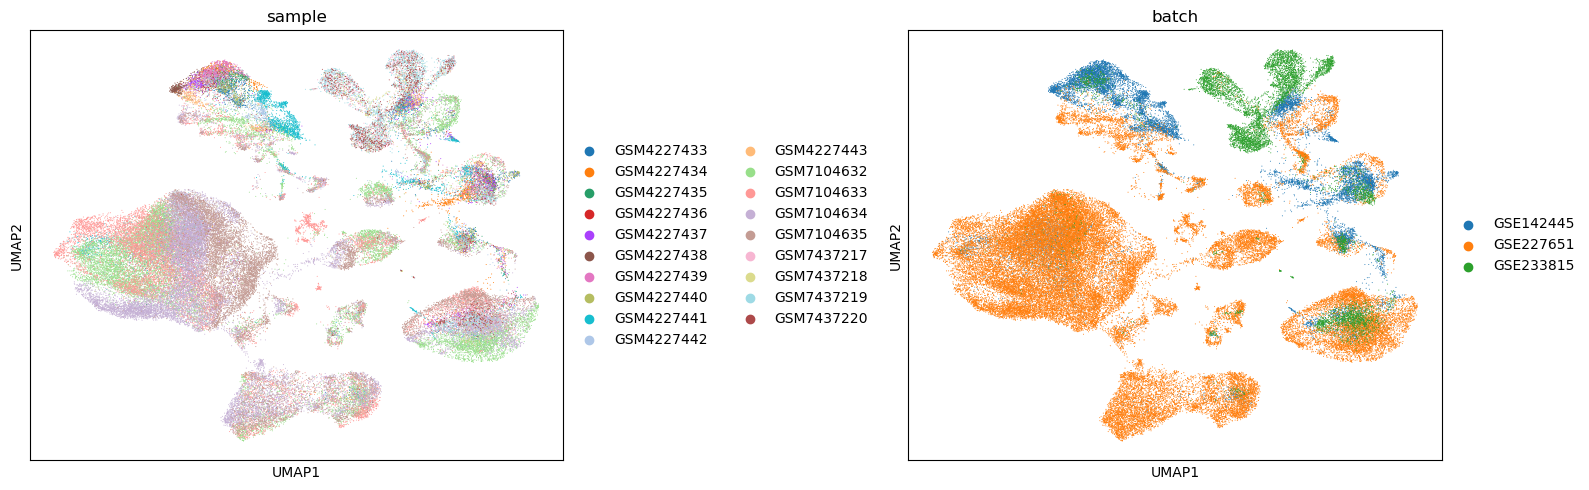

In [11]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
sc.pl.umap(adata, color="sample", size=2, ax=ax1, show=False)
sc.pl.umap(adata, color="batch", size=2, ax=ax2, show=False)
plt.tight_layout()
plt.show()

## 使用scVI和scANVI进行批次整合

In [ ]:
import shutil, json
import scanpy

with open("config.yaml", "r") as f:
    config = yaml.safe_load(f)

# 如果有文件则读取之前的文件
if os.path.exists(f"data/{config['project_code']}_cluster.h5ad"):
    adata = sc.read(f"data/{config['project_code']}_cluster.h5ad")

# cp /Volumes/MacPassport/project/bioinfo/GSE233815/data/small_marker_dict.json data/
if not os.path.exists("/Volumes/MacPassport/project/bioinfo/GSE233815/data/small_marker_dict.json"):
    shutil.copy(src="/Volumes/MacPassport/project/bioinfo/GSE233815/data/small_marker_dict.json",
                dst="data/")
# 加载小字典
with open("data/small_marker_dict.json", "r", encoding="utf-8") as f:
    small_marker_dict = json.load(f)

# 对比微型细胞类型标注字典，留下存在于测序数据中的marker基因
# 这里一定要在raw矩阵中搜索，否则可能会因为质控的hvg筛选而搜不到基因
smarker_genes_in_data = dict()
for celltype, markers in small_marker_dict.items():
    markers_found = list()
    for marker in markers:
        if marker in adata.raw.var.index:
            markers_found.append(marker)
    smarker_genes_in_data[celltype] = markers_found

# 除去不包含任何marker基因值的细胞类型键
del_markers = list()
for celltype, markers in smarker_genes_in_data.items():
    if markers==[]:
        del_markers.append(celltype)
for celltype in del_markers:
    del smarker_genes_in_data[celltype]

smarker_genes_in_data.keys()

# scinapy 半监督分类
import SCINApy as scina
# 删除 scina_local_labels 列
if 'scina_local_labels' in adata.obs.columns:
    del adata.obs['scina_local_labels']
scina.SCINA(adata=adata, signatures=small_marker_dict, allow_unknown=True, inplace=True)
adata.obs = adata.obs.rename(columns={'scina_labels': 'scina_local_labels'})

sc.pl.umap(adata, frameon=False, color='scina_local_labels')

adata.write(f"data/{config['project_code']}_cluster.h5ad")

这一步不能中断，否则容易把环境搞崩
如果时间过长，检查一下jax-metal有没有安装，训练过程是不是跑在cpu上

In [1]:
import scvi, os, yaml
import scanpy as sc

with open("config.yaml", "r") as f:
    config = yaml.safe_load(f)

# 如果有文件则读取之前的文件
if os.path.exists(f"data/{config['project_code']}_cluster.h5ad"):
    adata = sc.read(f"data/{config['project_code']}_cluster.h5ad")
    
# # 模型训练
# scvi.model.SCVI.setup_anndata(adata, batch_key="batch")
# model = scvi.model.SCVI(adata, n_layers=2, n_latent=30, gene_likelihood="nb")
# model.train(accelerator='gpu')

# # 数据评估
# adata.obsm["X_scvi"] = model.get_latent_representation()
# sc.pp.neighbors(adata, use_rep="X_scvi")
# sc.tl.umap(adata)

# lvae = scvi.model.SCANVI.from_scvi_model(
#     model,
#     adata=adata,
#     labels_key="scina_local_labels",
#     unlabeled_category="Unknown",
# )
# lvae.train(max_epochs=20, n_samples_per_label=100, accelerator='gpu')
# adata.obsm["scANVI"] = lvae.get_latent_representation()

# adata.write(f"data/{config['project_code']}_cluster.h5ad")

/opt/anaconda3/envs/scvi-env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/anaconda3/envs/scvi-env/lib/python3.12/site-packages/anndata/_core/anndata.py:1774: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


NameError: name 'sc' is not defined

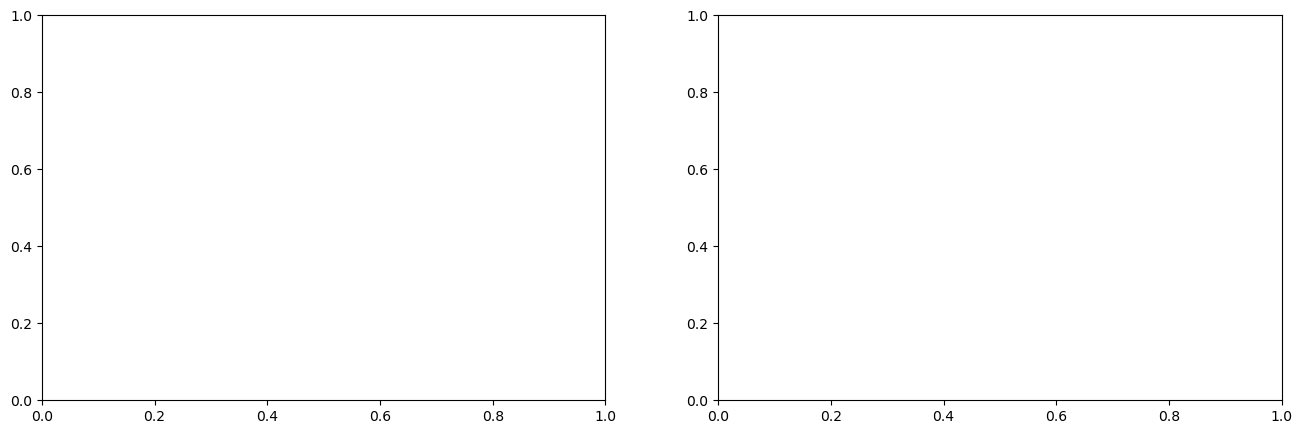

In [1]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
sc.pl.umap(adata, color="sample", size=2, ax=ax1, show=False)
sc.pl.umap(adata, color="batch", size=2, ax=ax2, show=False)
plt.tight_layout()
plt.show()

## 使用BBKNN进行批次整合

如果报包导入错误，而且和sklearn有关，查阅：https://github.com/Teichlab/bbknn/issues/64

In [6]:
# 如果有文件则读取之前的文件
if os.path.exists(f"data/{config['project_code']}_cluster.h5ad"):
    adata = sc.read(f"data/{config['project_code']}_cluster.h5ad")
    
sc.external.pp.bbknn(adata, 
                     batch_key='batch',
                     use_rep="X_pca",
                     copy=False,
                     n_pcs=50)
adata.write(f"data/{config['project_code']}_cluster.h5ad")
# import matplotlib.pyplot as plt
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
# sc.pl.umap(adata, color="sample", size=2, ax=ax1, show=False)
# sc.pl.umap(adata, color="dataset", size=2, ax=ax2, show=False)
# plt.tight_layout()
# plt.show()

computing batch balanced neighbors


/opt/anaconda3/envs/bioinfo/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


	finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)


## 整合后benchmark

In [5]:
import scanpy as sc
import os, yaml
from scib_metrics.benchmark import Benchmarker, BioConservation, BatchCorrection

with open("config.yaml", "r") as f:
    config = yaml.safe_load(f)

# 如果有文件则读取之前的文件
if os.path.exists(f"data/{config['project_code']}_cluster.h5ad"):
    adata = sc.read(f"data/{config['project_code']}_cluster.h5ad")
bm = Benchmarker(
    adata,
    batch_key="batch",
    label_key="scina_local_labels",
    bio_conservation_metrics=BioConservation(),
    batch_correction_metrics=BatchCorrection(),
    embedding_obsm_keys=["X_pca", "X_harmony", "X_scvi"],
    n_jobs=1,
)
bm.benchmark()

/opt/anaconda3/envs/bioinfo/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/anaconda3/envs/bioinfo/lib/python3.12/site-packages/scanpy/preprocessing/_pca/__init__.py:227: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  mask_var_param, mask_var = _handle_mask_var(adata, mask_var, use_highly_variable)
/opt/anaconda3/envs/bioinfo/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/anaconda3/envs/bioinfo/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. T

Metal device set to: Apple M3

systemMemory: 24.00 GB
maxCacheSize: 8.00 GB



: 

# 聚类

## 预处理

In [1]:
%reset -f
import numpy as np
import anndata as ad
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import yaml
import os

display(os.getcwd())
with open("config.yaml", "r") as f:
    config = yaml.safe_load(f)
sc.settings.verbosity = 3

adata = sc.read(f"data/{config['project_code']}_cluster.h5ad")

'/Volumes/MacPassport/project/bioinfo/sn_sc_intergration'

/opt/anaconda3/envs/bioinfo/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


## 基于leiden算法的聚类

In [2]:
for res in [0.25, 0.5, 1, 1.5, 2, 3]:
    sc.tl.leiden(adata, flavor="igraph", directed=False, resolution=res, key_added=f"leiden_res{res}",)

adata.write(f"data/{config['project_code']}_cluster.h5ad")

running Leiden clustering
    finished: found 15 clusters and added
    'leiden_res0.25', the cluster labels (adata.obs, categorical) (0:00:01)
running Leiden clustering
    finished: found 19 clusters and added
    'leiden_res0.5', the cluster labels (adata.obs, categorical) (0:00:01)
running Leiden clustering
    finished: found 30 clusters and added
    'leiden_res1', the cluster labels (adata.obs, categorical) (0:00:01)
running Leiden clustering
    finished: found 36 clusters and added
    'leiden_res1.5', the cluster labels (adata.obs, categorical) (0:00:01)
running Leiden clustering
    finished: found 40 clusters and added
    'leiden_res2', the cluster labels (adata.obs, categorical) (0:00:01)
running Leiden clustering
    finished: found 54 clusters and added
    'leiden_res3', the cluster labels (adata.obs, categorical) (0:00:01)


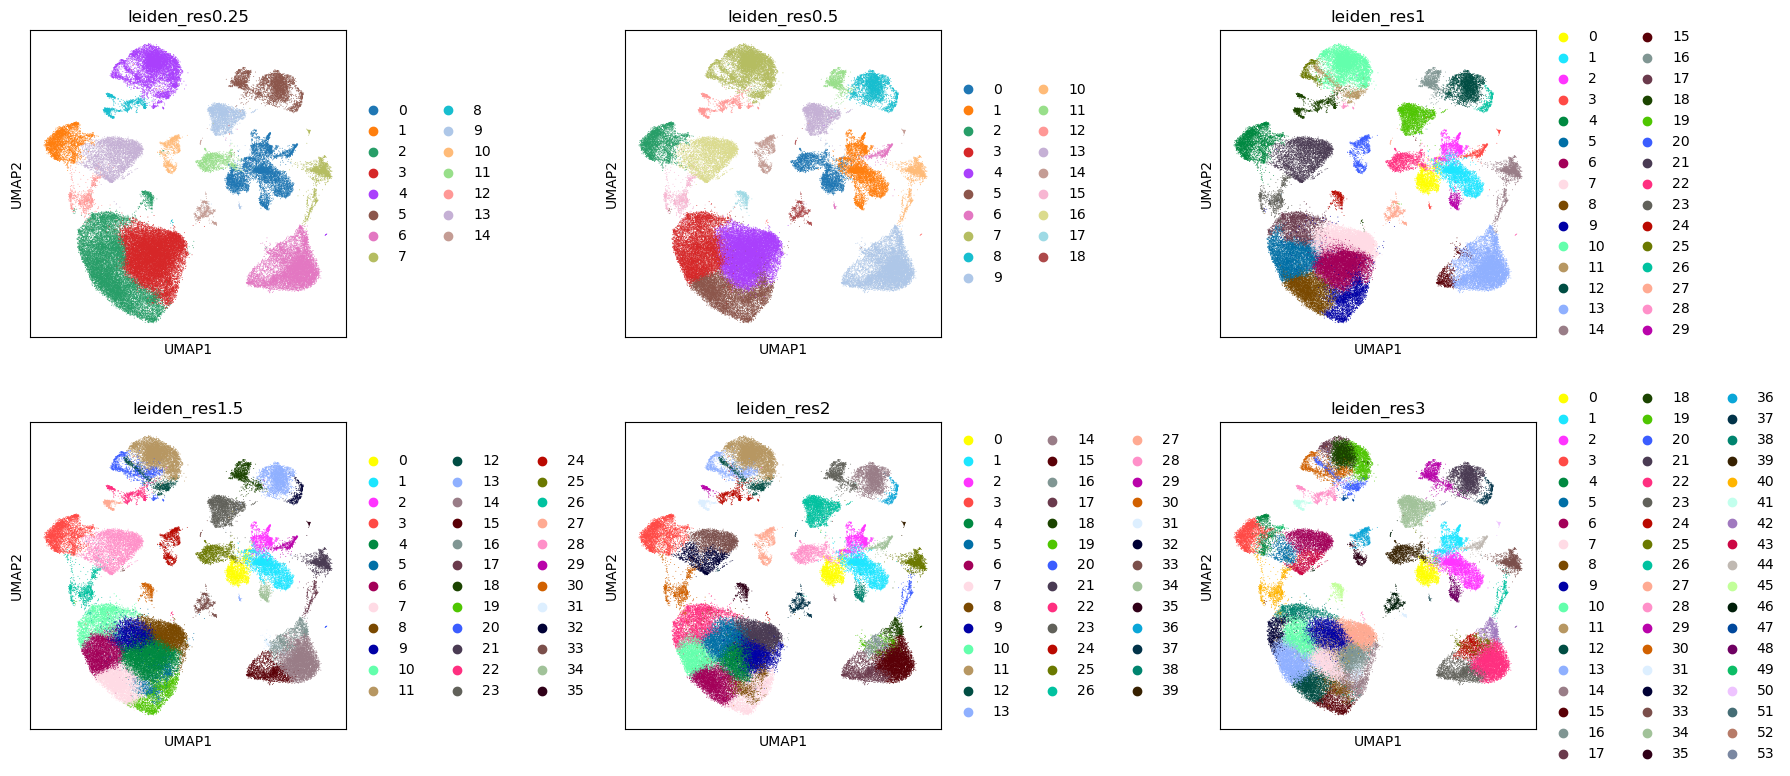

In [3]:
color_list = ["leiden_res0.25", "leiden_res0.5",  "leiden_res1",  "leiden_res1.5", "leiden_res2", "leiden_res3",]

# 指定网格布局
n_rows = 2
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))

# 将 axes 转换为一维数组以便迭代（如果行列数 > 1）
axes_flat = axes.flatten()

# 为每个 color 绘制 UMAP 图
for i, color in enumerate(color_list):
    if i < n_rows * n_cols:  # 确保不超出子图数量
        ax = axes_flat[i]
        sc.pl.umap(adata, color=color, ax=ax, show=False, title=color)
    else:
        break  # 如果 color_list 比子图多，停止绘制

# 隐藏多余的子图（如果 color_list 不足以填满网格）
for i in range(len(color_list), n_rows * n_cols):
    axes_flat[i].axis("off")

# 调整布局以避免重叠
plt.tight_layout()
plt.savefig("figures/all_leiden_result.pdf")

In [16]:
# 选择聚类结果
config["cluster_key_chosen"] = "leiden_res2"

with open('config.yaml', 'w') as file:
    yaml.dump(config, file, default_flow_style=False, allow_unicode=True)

# 细胞类型注释

## 逐细胞簇差异分析

In [17]:
%reset -f
import numpy as np
import anndata as ad
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import yaml
import os

os.getcwd()
with open("config.yaml", "r") as f:
    config = yaml.safe_load(f)
sc.settings.verbosity = 3

adata = sc.read(f"data/{config['project_code']}_cluster.h5ad")
cluster_key_chosen = config["cluster_key_chosen"]

/opt/anaconda3/envs/bioinfo/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


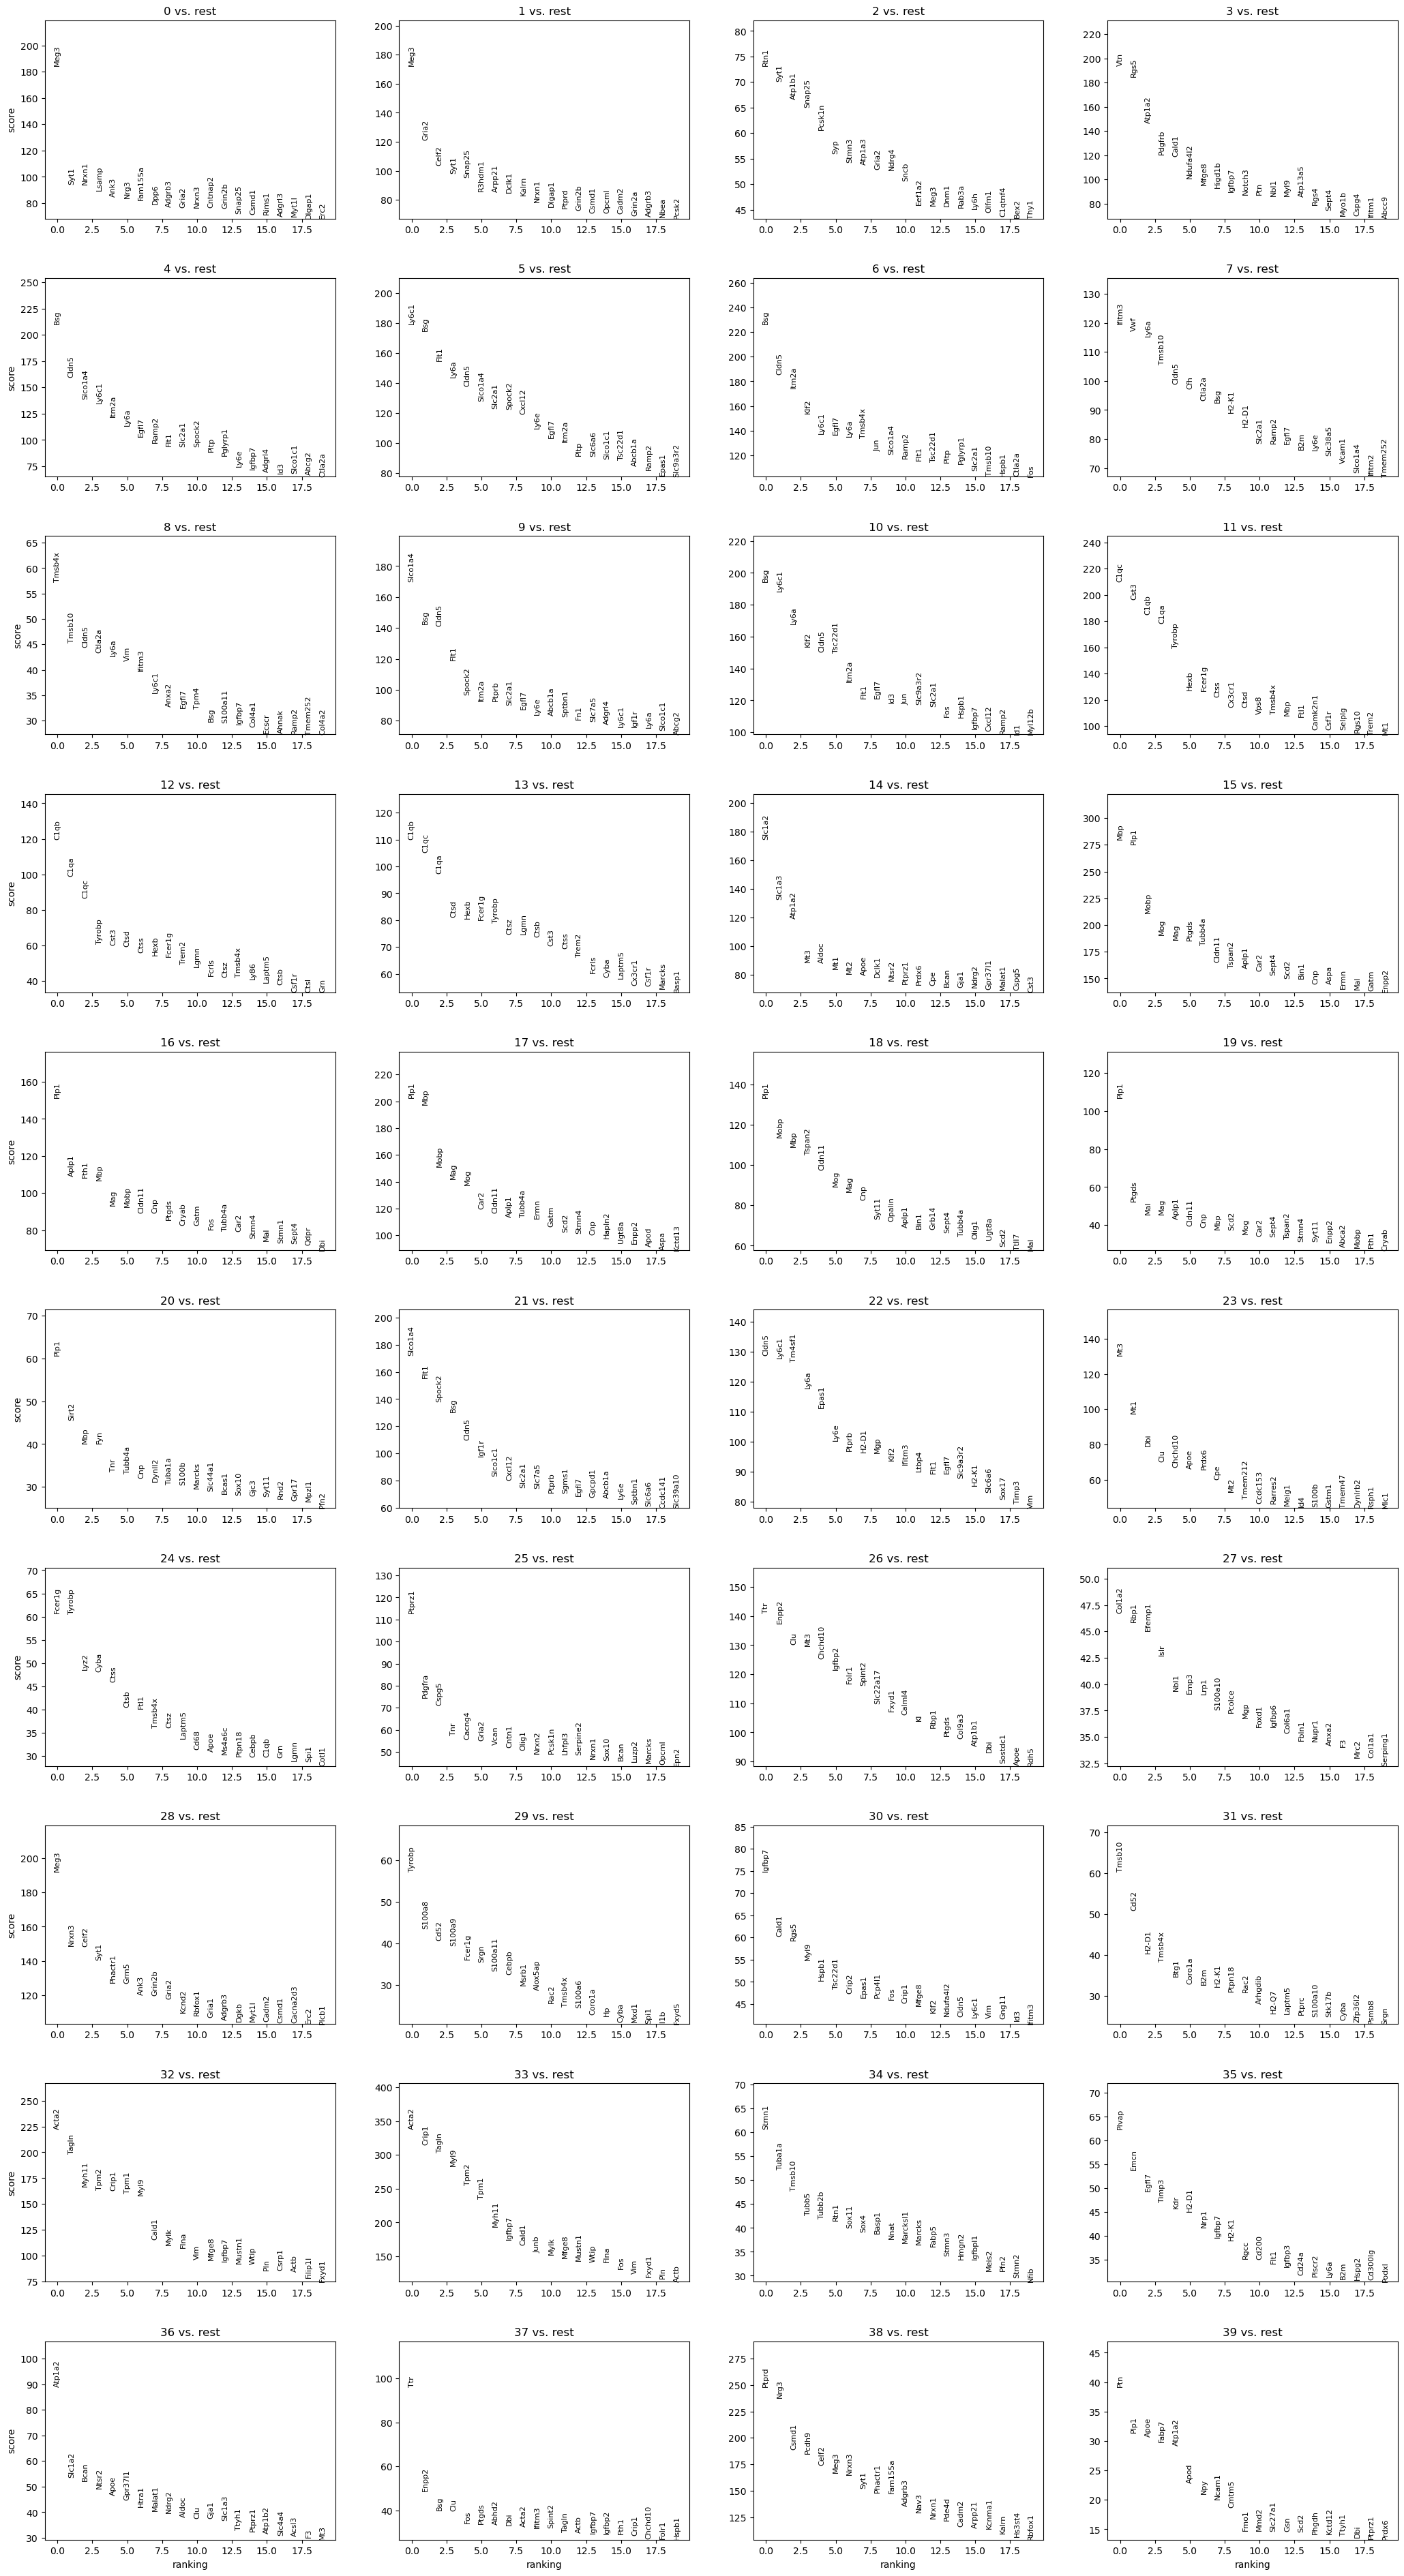

In [18]:
import warnings
warnings.filterwarnings('ignore')
# 找不到分群的时候查一下
adata_rank = sc.tl.rank_genes_groups(adata, cluster_key_chosen, method="t-test", use_raw=False, copy=True, pts=True)
# 结果存储在adata_rank.uns['rank_genes_groups']['names']
# 可视化分群结果
sc.pl.rank_genes_groups(adata_rank, n_genes=20, sharey=False)

if not os.path.exists("result/deg_by_leiden_cluster"):
    os.makedirs("result/deg_by_leiden_cluster")

for celltype in adata_rank.uns['rank_genes_groups']["names"].dtype.names:
    res = pd.DataFrame({'names': adata_rank.uns['rank_genes_groups']["names"][celltype], 
                        'scores': adata_rank.uns['rank_genes_groups']["scores"][celltype],
                        'pvals': adata_rank.uns['rank_genes_groups']["pvals"][celltype],
                        'pvals_adj': adata_rank.uns['rank_genes_groups']["pvals_adj"][celltype],
                        'log2foldchanges': adata_rank.uns['rank_genes_groups']["logfoldchanges"][celltype]})
    res = res.sort_values(
        by=["log2foldchanges", "pvals_adj"],
        key=lambda x: x.abs() if x.name == "log2foldchanges" else x,
        ascending=[False, True]
    )
    # res = res.sort_values(by=["log2foldchanges","pvals"], ascending=[False,True])
    mask = (res['log2foldchanges'].abs() > 1) & (res['pvals'] < 0.1)
    res.loc[mask,:].to_csv(f"result/deg_by_leiden_cluster/deg_of_{celltype}.tsv", index=None, sep="\t")

# 重置warning
warnings.resetwarnings()
# 保存差异分析结果
adata_rank.write(f"data/{config['project_code']}_annotated.h5ad")

## 基于经验marker的SCINA算法半自动标注结果

|分组|细胞类型|基因|
|----|-------|----|
|血液|Erythroid progenitor cell|['Adgre1','Csf1r','Epor','Gata1','Gypa','Klf1','Hbb-a1']|
|血液|Immune cell|['Ccr7','Cd11b','Cd3','Cd3d','Cd3e','Cd3g','Cd4','Ptprc','Cd74','Cd79a','Cd8','Cd83']|
|血液|T cell|['Cd3d', 'Cd3e', 'Cd3g']|
|血液|B cell|['Cd79a','Ms4a1','Cd19']|
|血液|Dendritic cell|['Clec9a', 'Flt3', 'Zbtb46']|
|血液|Monocyte|['Ly6c2','Ccr2','Cd68']|
|血液|Macrophage|['Iba1', 'Mrc1', 'Cd68', 'F13a1','Itgam']|
|血液|Neutrophil|['Lcn2', 'Ly6g', 'S100a8','Mmp8','Mmp9']|
|血液|Mast cell|['Kit','Tpsb2','Tpsab1']|
|血脑屏障及其附属结构|Vascular cells|['Myl9', 'Mgp46']|
|血脑屏障及其附属结构|Vascular endothelial cell|['Cldn5','Pecam1','Cdh5','Slc38a5']|
|血脑屏障及其附属结构|Vascular smooth muscle cell|['Myh11','Acta2','Tagln','Rgs5']|
|血脑屏障及其附属结构|Endothelial cell|['Esam', 'Cldn5', 'Ly6c1', 'Ly6a', 'Itm2a']|
|血脑屏障及其附属结构|Pericyte|['Rgs5','Abcc9','Kcnj8','Pdgfrb']|
|血脑屏障及其附属结构|Fibroblast|['Col1a1','Dcn','Pdgfra','Col3a1']|
|血脑屏障及其附属结构|Schwann cell|['Mbp','Ttr']|
|血脑屏障及其附属结构|Choroid cells|['Lcn2']|
|血脑屏障及其附属结构|Choroid plexus cell|['Folr1']|
|血脑屏障及其附属结构|Ependymal cell|['Ccdc153','Foxj1','Tmem212','Dnah11','Ccdc153','Foxj1','Tmem212','Dnah11']|
|脑实质组织|Oligodendrocyte|['Mbp', 'Mog','Olig2','Olig1','Plp1','Mag','Cldn11']|
|脑实质组织|Oligodendrocyte progenitor cell|['Pdgfra', 'Ascl1', 'Dcn', 'Ednrb','Ng2']|
|脑实质组织|Oligodendrocyte precursor cell|['Pdgfra', 'Olig1','Cacng4','Olig2','Sox10']|
|脑实质组织|Microglial cell|['Tmem119','Cx3cr1','P2ry12','Iba1','Csf1r','C1qa','Cd11b','Itgam','Fcrls','Cd68','Aif1','Sall1','Hexb','F11r']|
|脑实质组织|Astrocyte|['Gfap', 'Aqp4', 'Gja1']|
|脑实质组织|Neuron|['Rbfox3','Snap25','Map2','Tubb3','Stmn2','Dcx']|

In [9]:
%reset -f
import numpy as np
import anndata as ad
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import yaml
import json
import os,shutil

os.getcwd()
with open("config.yaml", "r") as f:
    config = yaml.safe_load(f)
sc.settings.verbosity = 3

adata = sc.read(f"data/{config['project_code']}_annotated.h5ad")

# cp /Volumes/MacPassport/project/bioinfo/GSE233815/data/small_marker_dict.json data/
if not os.path.exists("/Volumes/MacPassport/project/bioinfo/GSE233815/data/small_marker_dict.json"):
    shutil.copy(src="/Volumes/MacPassport/project/bioinfo/GSE233815/data/small_marker_dict.json",
                dst="data/")
# 加载小字典
with open("data/small_marker_dict.json", "r", encoding="utf-8") as f:
    small_marker_dict = json.load(f)

# 对比微型细胞类型标注字典，留下存在于测序数据中的marker基因
# 这里一定要在raw矩阵中搜索，否则可能会因为质控的hvg筛选而搜不到基因
smarker_genes_in_data = dict()
for celltype, markers in small_marker_dict.items():
    markers_found = list()
    for marker in markers:
        if marker in adata.raw.var.index:
            markers_found.append(marker)
    smarker_genes_in_data[celltype] = markers_found

# 除去不包含任何marker基因值的细胞类型键
del_markers = list()
for celltype, markers in smarker_genes_in_data.items():
    if markers==[]:
        del_markers.append(celltype)
for celltype in del_markers:
    del smarker_genes_in_data[celltype]

smarker_genes_in_data.keys()

/opt/anaconda3/envs/bioinfo/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


dict_keys(['Erythroid progenitor cell', 'Immune cell', 'T cell', 'B cell', 'Dendritic cell', 'Macrophage', 'Neutrophil', 'Vascular cells', 'Vascular endothelial cell', 'Vascular smooth muscle cell', 'Endothelial cell', 'Pericyte', 'Fibroblast', 'Schwann cell', 'Choroid plexus cell', 'Ependymal cell', 'Oligodendrocyte', 'Oligodendrocyte progenitor cell', 'Oligodendrocyte precursor cell', 'Microglial cell', 'Astrocyte', 'Neuron'])

In [10]:
# scinapy 半监督分类
import SCINApy as scina
# 删除 scina_local_labels 列
if 'scina_local_labels' in adata.obs.columns:
    del adata.obs['scina_local_labels']
scina.SCINA(adata=adata, signatures=small_marker_dict, allow_unknown=True, inplace=True)
adata.obs = adata.obs.rename(columns={'scina_labels': 'scina_local_labels'})
adata.write(f"data/{config['project_code']}_annotated.h5ad")

/opt/anaconda3/envs/bioinfo/lib/python3.12/site-packages/SCINApy/core.py:333: RuntimeWarning: overflow encountered in exp
  tmp = np.exp(exponent_term, dtype=np.float64)
/opt/anaconda3/envs/bioinfo/lib/python3.12/site-packages/SCINApy/core.py:333: RuntimeWarning: overflow encountered in exp
  tmp = np.exp(exponent_term, dtype=np.float64)
/opt/anaconda3/envs/bioinfo/lib/python3.12/site-packages/SCINApy/core.py:333: RuntimeWarning: overflow encountered in exp
  tmp = np.exp(exponent_term, dtype=np.float64)
/opt/anaconda3/envs/bioinfo/lib/python3.12/site-packages/SCINApy/core.py:333: RuntimeWarning: overflow encountered in exp
  tmp = np.exp(exponent_term, dtype=np.float64)
/opt/anaconda3/envs/bioinfo/lib/python3.12/site-packages/SCINApy/core.py:333: RuntimeWarning: overflow encountered in exp
  tmp = np.exp(exponent_term, dtype=np.float64)
/opt/anaconda3/envs/bioinfo/lib/python3.12/site-packages/SCINApy/core.py:333: RuntimeWarning: overflow encountered in exp
  tmp = np.exp(exponent_term

KeyError: 'scina_local_labels'

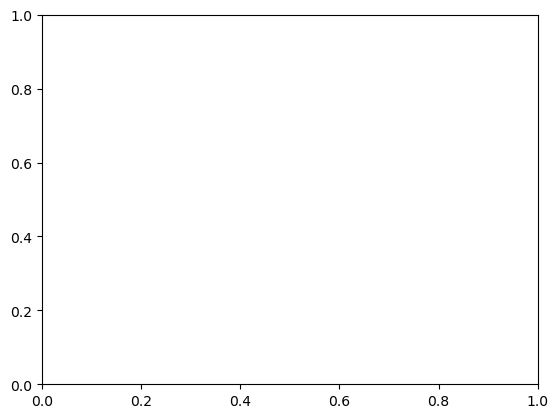

In [10]:
sc.pl.umap(adata, frameon=False, color='scina_local_labels')
sc.pl.umap(adata, frameon=False, legend_loc='on data', color='scina_local_labels')

## 手动注释（基于聚类）

1. 优先认可自动注释结果，要求平均可能性超过50%
2. 其次选择手动注释结果，要求高表达量占比超过50%

In [13]:
%reset -f
import numpy as np
import anndata as ad
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import yaml
import os

display(os.getcwd())
with open("config.yaml", "r") as f:
    config = yaml.safe_load(f)
sc.settings.verbosity = 3

adata = sc.read(f"data/{config['project_code']}_annotated.h5ad")
cluster_key_chosen = config["cluster_key_chosen"]

'/Volumes/MacPassport/project/bioinfo/sn_sc_intergration'

/opt/anaconda3/envs/bioinfo/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


**文章中的marker列表**

1. 神经元: Rtn1, Sox4 
2. 星形胶质细胞: F3, Gja1, Slc1a3, Gjb6
3. 少突胶质细胞: Cldn11, Mag, Opalin, Ermn, Mog
4. 少突胶质细胞祖细胞: Olig1, Olig2, Pdgfra, Tnr, C1ql1, Matn4 
5. 小胶质细胞: Hexb, C1qa, Tmem119, GRP34, OLFML3 
6. T 细胞: Cd8a, Klrd1, Cd4 
7. 中性粒细胞: Trem1, Mmp8 
8. 单核细胞: CD14, CD86 
9. B 细胞: CD19, CD79a
10. 内皮细胞: Cldn5, Ly6c1, Ly6a, Itm2a
11. 血管平滑肌细胞: Acta2, Des, Tpm2, Filip1l
12. 室管膜: Calml4, Chchd10, Clu 
13. 脉络丛细胞: Ttr, Clic6, Sostdc1, Car12, Prlr, Htr2c
14. 周细胞: VKcnj8, Atp13a5, Anpep, Abcc9, CD248 

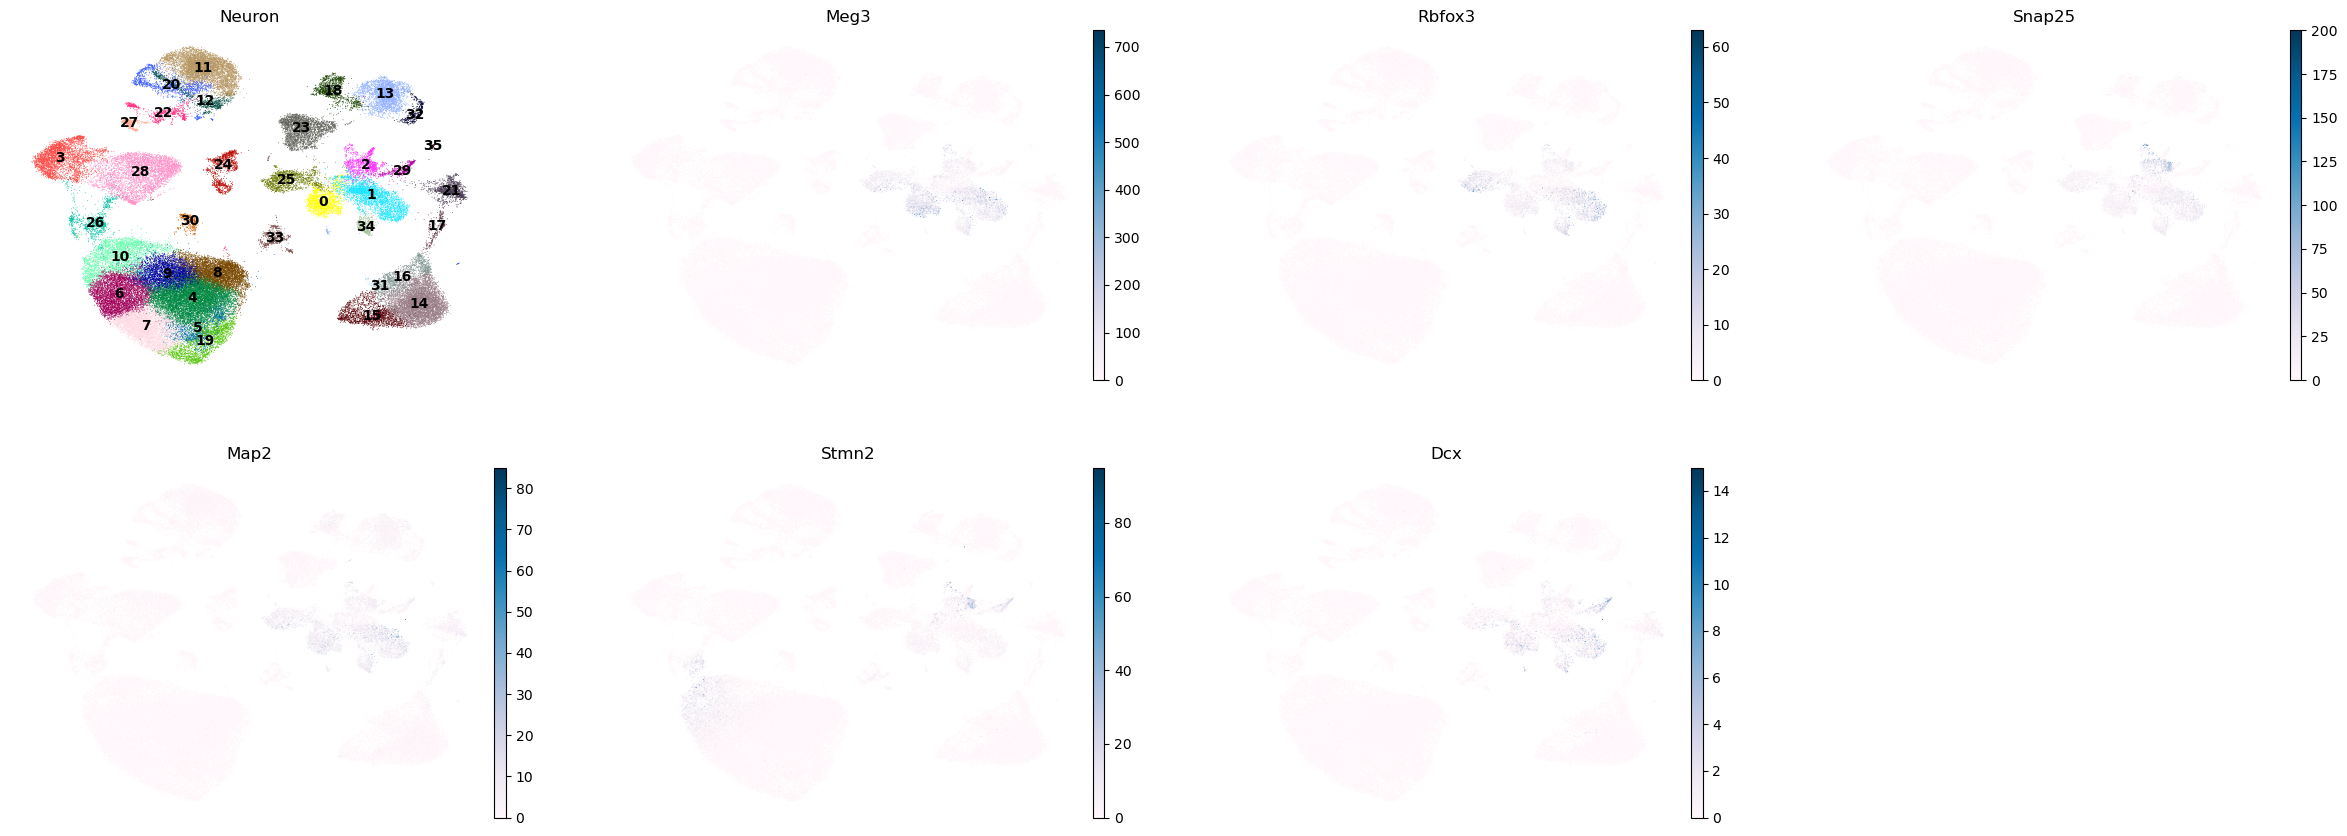

In [ ]:
# # 神经元
# sc.pl.umap(adata, frameon=False, title="Neuron", legend_loc='on data', color=[cluster_key_chosen, "Meg3","Rbfox3","Snap25","Map2","Stmn2","Dcx"], cmap='PuBu')
# 星形胶质细胞
sc.pl.umap(adata, frameon=False, title="Astrocyte", legend_loc='on data', 
           color=[cluster_key_chosen, 'Aqp4', 'Atp1b2', 'Gfap', 'S100b', 'Aldh1l1', 'Aldoc', 'Slc1a2', 'Slc1a3', 'F3', 'Gja1', 'Gjb6'], cmap='PuBu')
# 少突胶质细胞
sc.pl.umap(adata, frameon=False, title="Oligodendrocyte", legend_loc='on data', 
           color=[cluster_key_chosen, 'Mbp', 'Plp1', 'Cldn11', 'Mobp', 'Opalin', 'Ermn'], cmap='PuBu')

# # 免疫细胞
# sc.pl.umap(adata, frameon=False, title="Immune cells", legend_loc='on data', color=[cluster_key_chosen, 'Inpp5d', 'Csf1r'], cmap='PuBu')
# # 小胶质细胞
# sc.pl.umap(adata, frameon=False, title="Microglia", legend_loc='on data', 
#            color=[cluster_key_chosen, 'Tmem119', 'Cx3cr1', 'Aif1', 'Hexb', 'C1qa', 'Olfml3'], cmap='PuBu')
# # 巨噬细胞
# sc.pl.umap(adata, frameon=False, title="Macrophage", legend_loc='on data', 
#            color=[cluster_key_chosen, 'Cd68', 'Csf1r', 'Adgre1', 'Cd14', 'Cd86', 'Mrc1', 'Itgam', 'Fcgr1', 'Tnf', 'Il1b', 'Cx3cr1', 'Ctss', 'Hexb', 'Laptm5', 'Tyrobp'], cmap='PuBu')
# # 单核细胞
# sc.pl.umap(adata, frameon=False, title="Monocyte", legend_loc='on data', 
#            color=[cluster_key_chosen, 'Cd86', 'Cd14'], cmap='PuBu')
# # T细胞
# sc.pl.umap(adata, frameon=False, title="T cell", legend_loc='on data', 
#            color=[cluster_key_chosen, 'Cd8a', 'Klrd1', 'Cd4'], cmap='PuBu')
# # B细胞
# sc.pl.umap(adata, frameon=False, title="B cell", legend_loc='on data', 
#            color=[cluster_key_chosen, 'Cd19', 'Cd79a'], cmap='PuBu')
# # 中性粒细胞
# sc.pl.umap(adata, frameon=False, title="Neutrophil", legend_loc='on data', 
#            color=[cluster_key_chosen, 'Trem1', 'Lcn2', 'Ly6g', 'S100a8','Mmp8','Mmp9' ], cmap='PuBu')

# # 干细胞和祖细胞 stem and progenitor cells Pdgfra是星胶干细胞和祖细胞
# sc.pl.umap(adata, frameon=False, title="stem and progenitor cells", legend_loc='on data', color=[cluster_key_chosen, 'Sox10', 'Vcan', 'Pdgfra'], cmap='PuBu')
# # 少突胶质祖细胞 Oigodendrocyte progenitor cell
# # Grok除了Olig1和Olig2、Pdgfra都不推荐作为marker
# sc.pl.umap(adata, frameon=False, title="Oligodendrocyte progenitor cell", legend_loc='on data', 
#            color=[cluster_key_chosen, 'Pdgfra', 'Cspg4', 'Vcan', 'Olig1', 'Olig2', 'Pdgfra', 'Tnr', 'C1ql1', 'Matn4'], cmap='PuBu')

# # 内皮细胞 Flt1就是VEGFR1
# sc.pl.umap(adata, frameon=False, title="Endothelial cell", legend_loc='on data', 
#            color=[cluster_key_chosen,'Pecam1','Flt1', 'Cldn5', 'Ly6c1', 'Ly6a', 'Itm2a', 'Esam'], cmap='PuBu')
# # 血管平滑肌细胞
# sc.pl.umap(adata, frameon=False, title="Vascular smooth-muscle cell", legend_loc='on data', color=[cluster_key_chosen, 'Acta2', 'Des', 'Tpm2', 'Filip1l'], cmap='PuBu')
# # 血管内皮细胞
# sc.pl.umap(adata, frameon=False, title="Vascular endothelial cell", legend_loc='on data', color=[cluster_key_chosen, 'Flt1',"Cldn5","Pecam1","Cdh5","Slc38a5"], cmap='PuBu')
# # # 脉络丛细胞
# # sc.pl.umap(adata, frameon=False, title="Choroid plexus cell", legend_loc='on data', color=[cluster_key_chosen, 'Ttr', 'Clic6', 'Sostdc1', 'Car12', 'Prlr', 'Htr2c'], cmap='PuBu')
# # # 壁细胞 mural cell
# # sc.pl.umap(adata, frameon=False, title="mural cell", legend_loc='on data', color=[cluster_key_chosen, 'Pdgfrb', 'Cspg4'], cmap='PuBu')
# # 周细胞 Pericyte
# sc.pl.umap(adata, frameon=False, title="Pericyte", legend_loc='on data', color=[cluster_key_chosen, 'Kcnj8', 'Atp13a5', 'Anpep', 'Abcc9', 'Cd248',"Pdgfrb"], cmap='PuBu')
# # 室管膜细胞 Ependymal cells
# sc.pl.umap(adata, frameon=False, title="Ependymal cell", legend_loc='on data', 
#            color=[cluster_key_chosen, 'Ccdc153','Foxj1','Calml4', 'Chchd10', 'Clu'], cmap='PuBu')

# # 成纤维细胞
# sc.pl.umap(adata, frameon=False, title="Fibroblast", legend_loc='on data', 
#            color=[cluster_key_chosen, 'Col1a1','Col1a2','Col3a1', 'Dcn', 'Pdgfra'], cmap='PuBu')

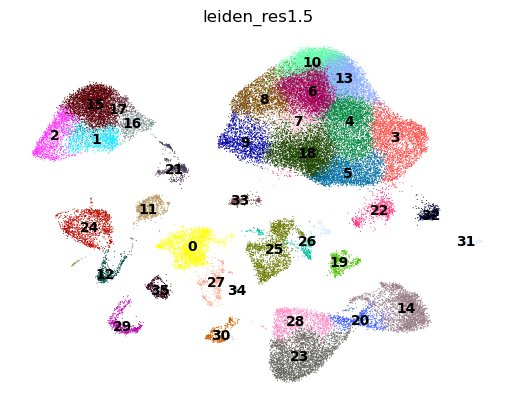

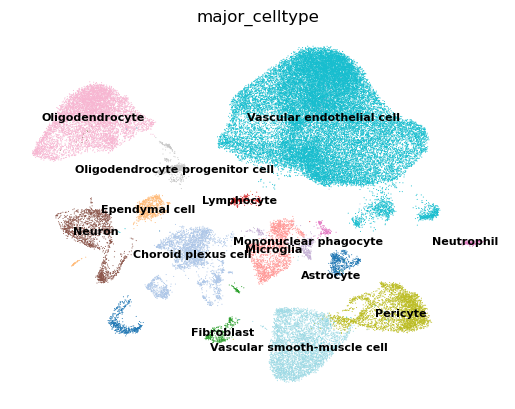

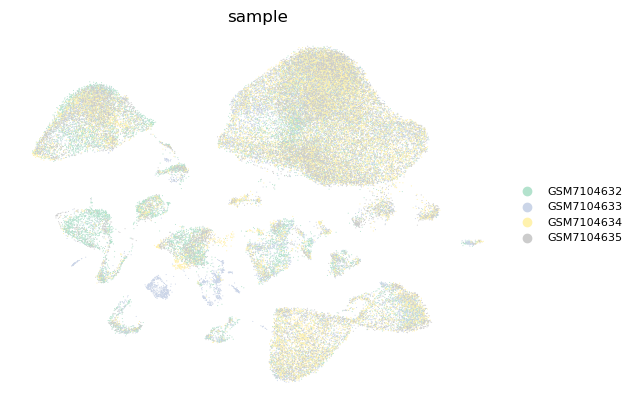

In [ ]:
# ('\d+':)'.*',\s#.* -> $1'', # 
cluster2annotation = {
    '0':'', # Neuron
    '1':'', # Neuron
    '2':'', # Neuron
    '3':'', # 
    '4':'', # 
    '5':'', # 
    '6':'', # 
    '7':'', # 
    '8':'', # 
    '9':'', # 
    '10':'', # 
    '11':'', # 
    '12':'', # 
    '13':'', # 
    '14':'', # 
    '15':'', # 
    '16':'', # 
    '17':'', # 
    '18':'', # 
    '19':'', # 
    '20':'', # 
    '21':'', # 
    '22':'', # 
    '23':'', # 
    '24':'', # 
    '25':'', # Neuron
    '26':'', # 
    '27':'', # 
    '28':'', # 
    '29':'', # Neuron
    '30':'', # 
    '31':'', # 
    '32':'', # 
    '33':'', # 
    '34':'', # Neuron
    '35':'', # 
    '36':'', # 
    '37':'', # 
    '38':'', # 
    '39':'', # 
}
adata.obs['major_celltype'] = adata.obs[cluster_key_chosen].map(cluster2annotation).astype('category')

sc.pl.umap(adata, legend_loc="on data", frameon=False, color=cluster_key_chosen)
sc.pl.umap(adata, frameon=False, color='major_celltype', legend_loc="on data", 
           palette="tab20",
           legend_fontsize=8, save="_final_annotation_on_data.pdf")
sc.pl.umap(adata, frameon=False, color='sample', legend_fontsize=8,
    # palette=['#66c2a5','#fc8d62','#8da0cb'], 
    palette="Pastel2",
    save="_final_annotation_by_sample.pdf")

adata.write(f"data/{config['project_code']}_annotated.h5ad")

## 细胞类型占比

In [ ]:
%reset -f
# import sys
# sys.path.append(r"D:\Python\omictools")
# import omictools as otl
import numpy as np
import anndata as ad
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
import json
import os

os.getcwd()
with open("config.yaml", "r") as f:
    config = yaml.safe_load(f)
sc.settings.verbosity = 3

adata = sc.read(f"data/{config['project_code']}_annotated.h5ad")

# 读取分组信息
targets = pd.read_csv("data/targets.csv")
display(adata)
# 百分比
cross_table = pd.crosstab(adata.obs['sample'], adata.obs['major_celltype'])
cross_table.loc["all", :] = cross_table.sum(axis=0)
percent_table = cross_table.div(cross_table.sum(axis=1), axis=0) * 100
percent_table

/opt/anaconda3/envs/bioinfo/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 54173 × 2000
    obs: 'condition', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'passing_hb', 'n_genes', 'doublet_score', 'predicted_doublet', 'leiden_res0.25', 'leiden_res0.5', 'leiden_res1', 'leiden_res1.5', 'leiden_res2', 'leiden_res3', 'scina_local_labels', 'major_celltype'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'leiden_res0.25', 'leiden_res0.5', 'leiden_res1', 'leiden_res1.5', 

major_celltype,Astrocyte,Choroid plexus cell,Ependymal cell,Fibroblast,Lymphocyte,Microglia,Mononuclear phagocyte,Neuron,Neutrophil,Oligodendrocyte,Oligodendrocyte progenitor cell,Pericyte,Vascular endothelial cell,Vascular smooth-muscle cell
sample,,,,,,,,,,,,,,
GSM7104632,2.993864,6.074506,2.863696,1.146718,0.266534,4.797620,1.140519,7.481560,0.458687,15.558173,1.636397,5.312093,45.862518,4.407116
GSM7104633,1.866715,7.349626,0.495987,1.037064,0.577149,4.193345,0.604202,0.991974,0.811615,9.117143,0.802597,7.701326,56.822076,7.629182
GSM7104634,0.883231,3.161357,0.877140,0.237559,0.828410,1.924834,0.718767,0.810136,0.444661,11.287080,0.438570,5.591765,61.838338,10.958153
GSM7104635,1.841656,4.907917,1.224606,0.427188,0.408202,1.575850,0.531612,2.648567,0.313271,13.812417,1.319537,4.936396,58.458325,7.594456
all,1.899470,5.225851,1.458291,0.708840,0.527938,3.176859,0.784524,3.191627,0.498403,12.605911,1.041109,5.812859,55.396600,7.671718


## 累积百分比柱状图

/var/folders/dt/7dzhx38d0nj0_rtw34d7trx00000gn/T/ipykernel_4319/3533222639.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', num_categories).colors
/var/folders/dt/7dzhx38d0nj0_rtw34d7trx00000gn/T/ipykernel_4319/3533222639.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


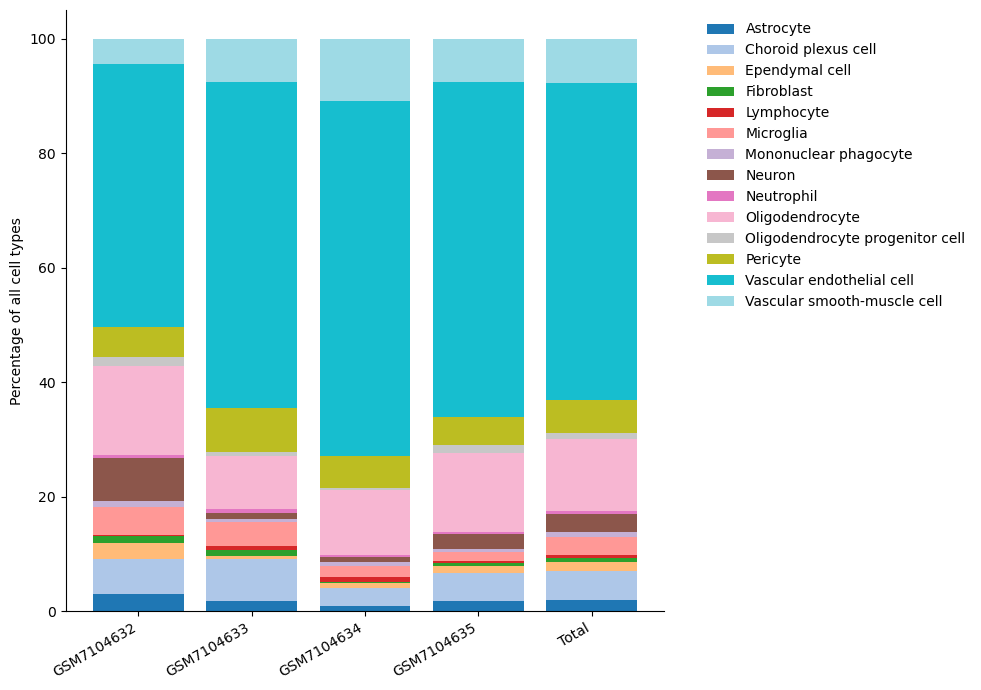

In [ ]:
# plt.rcParams.update({
#     "text.usetex": True, #使用latex
#     "font.family": "serif",  # 或 "cmr" 等 LaTeX 支持的字体
#     "font.serif": ["Times New Roman"], #设置具体的字体，可以解决一些字体缺失的问题
# })

# 创建图表
plt.figure(figsize=(10,7))

# 设置背景为白色
plt.gcf().set_facecolor('white')  # 设置 figure 的背景色
plt.gca().set_facecolor('white')  # 设置 axes 的背景色

# 隐藏边框
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

# 获取样本和类别
samples = percent_table.index
categories = percent_table.columns

# 初始化 bottom 数组
bottom = np.zeros(len(samples))

# 设置颜色列表
num_categories = len(categories)
colors = plt.cm.get_cmap('tab20', num_categories).colors

# 循环绘制堆叠柱状图
for i, category in enumerate(categories):
    plt.bar(samples, percent_table[category],
        # width=0.2, # 柱子的宽度
        bottom=bottom, # 柱子底部在 y 轴上的位置
        label=category, linewidth=0, color=colors[i]) # linewidth=0 去除分割线
    bottom += percent_table[category].values


# 修改 x 轴刻度标签
new_labels = list(targets['id']) + ['Total']  # 新的标签列表
ax.set_xticklabels(new_labels)
plt.xticks(range(len(samples)), new_labels, rotation=30, ha='right')

# 添加标签、标题和图例
# plt.xlabel('Sample')
plt.ylabel('Percentage of all cell types') # 修改 y 轴标签
# plt.title('Stacked Bar Chart (Percentage)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False) # 图例放到图表外, 去掉背景和灰色外框

# 去除y轴刻度线和数字
# plt.gca().tick_params(axis='y', left=False, labelleft=False)

# 显示图表
plt.tight_layout()
plt.savefig("figures/all_celltype_percentage.pdf")

In [ ]:
cross_table.sum(axis=1).astype(int)

sample
GSM7104632    16133
GSM7104633    11089
GSM7104634    16417
GSM7104635    10534
all           54173
dtype: int64